<a href="https://colab.research.google.com/github/ataulhaque/ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(data_url, names=column_names)


In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(iris_df.shape)

(150, 5)


In [ ]:
x = iris_df.iloc[:,:-1].values
y = iris_df.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_train)

In [ ]:
accuracy = accuracy_score(y_train,y_pred)
print(accuracy)

0.9714285714285714


In [ ]:
y_pred = classifier.predict(x_test)

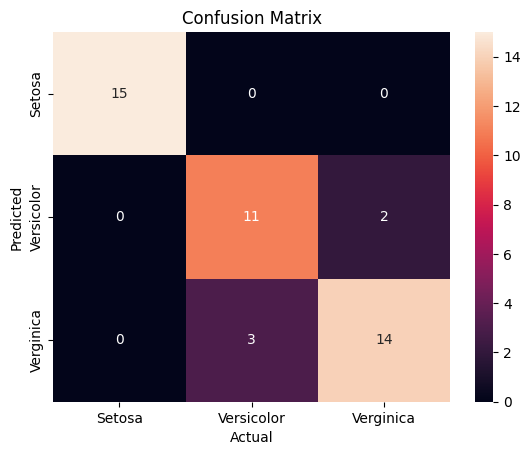

In [ ]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test,y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Verginica'],
            yticklabels=['Setosa', 'Versicolor', 'Verginica'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
result1 = classification_report(y_test,y_pred)
print(result1)
result2 = accuracy_score(y_test,y_pred)
print(result2)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      0.85      0.81        13
 Iris-virginica       0.88      0.82      0.85        17

       accuracy                           0.89        45
      macro avg       0.89      0.89      0.89        45
   weighted avg       0.89      0.89      0.89        45

0.8888888888888888


In [ ]:
from sklearn.svm import SVC
accuracy_list = []
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel_list:
    svclassifier = SVC(kernel=i)
    svclassifier.fit(x_train, y_train)
    y_pred = svclassifier.predict(x_train)
    accuracy = accuracy_score(y_train,y_pred)
    accuracy_list.append(accuracy)
    print("accuracy of " + i, "is ", accuracy)

accuracy of linear is  0.9904761904761905
accuracy of poly is  0.9619047619047619
accuracy of rbf is  0.9904761904761905
accuracy of sigmoid is  0.9047619047619048


In [ ]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

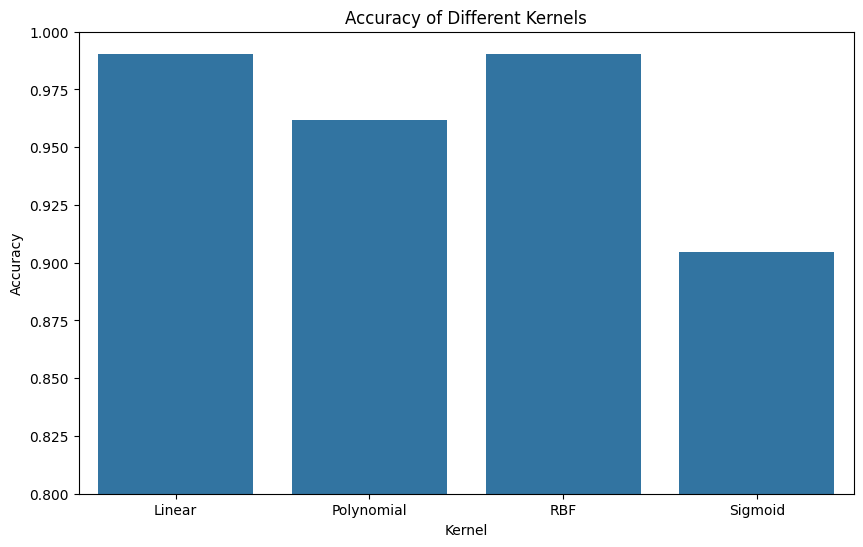

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Kernels')
plt.ylim(0.8, 1)
plt.show()

In [ ]:
accuracy_list = []
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel_list:
    svclassifier = SVC(kernel=i)
    svclassifier.fit(x_test, y_test)
    y_pred = svclassifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)
    print("accuracy of " + i, "is ", accuracy)

accuracy of linear is  0.9555555555555556
accuracy of poly is  0.8666666666666667
accuracy of rbf is  0.9777777777777777
accuracy of sigmoid is  0.8666666666666667


In [ ]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

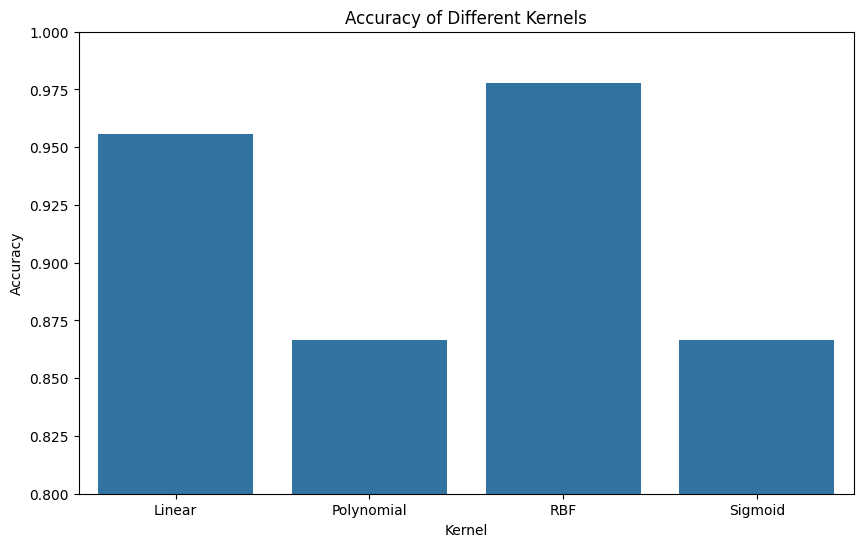

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Kernels')
plt.ylim(0.8, 1)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier  = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
result3 = confusion_matrix(y_test,y_pred)

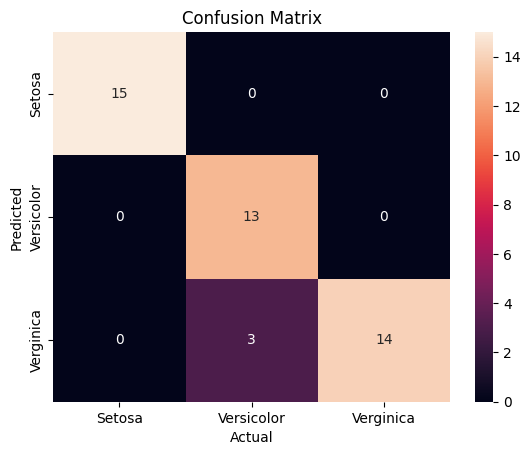

In [ ]:
sns.heatmap(result3,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Verginica'],
            yticklabels=['Setosa', 'Versicolor', 'Verginica'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
result4 = classification_report(y_test,y_pred)
print(result4)
result5 = accuracy_score(y_test,y_pred)
print(result5)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.82      0.90        17

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.93        45
   weighted avg       0.95      0.93      0.93        45

0.9333333333333333
